#**TASK-2**<br>Design And Train A Deep Learning Model For Image Classification And NLP

###(A) Design A deep learning model for image classification.

Step-1:Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


Step-2: Load and Explore Dataset

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Step-3: Visualize Some Images

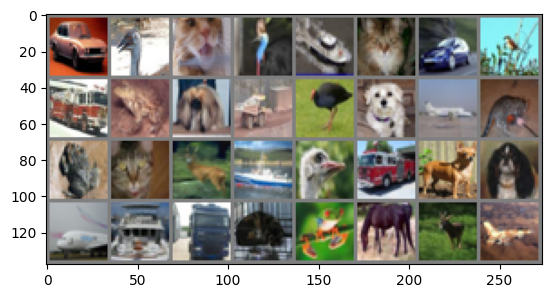

car bird cat bird ship cat car bird


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))


Step-4: Build the Deep Learning Model (CNN)

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()


Step-5: Define Loss and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


###(B) Train a deep learning model for image classification.

Step-6: Train the Model

In [ ]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.4f}')


Epoch 1, Loss: 1.2746
Epoch 2, Loss: 0.8724
Epoch 3, Loss: 0.6665
Epoch 4, Loss: 0.4951


KeyboardInterrupt: 

Step-7: Evaluate the Model

In [ ]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on 10000 test images: 73.11%


Step-8: Save the Model

In [ ]:
torch.save(model.state_dict(), 'cnn_cifar10.pth')


###(C) Design A deep learning model for NLP

Step-1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


Step-2: Load and Explore Dataset

In [ ]:
# Load dataset from Kaggle
df = pd.read_csv('/content/Fake.csv', engine='python', quotechar='"')

# Display basic information
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataset shape: (23481, 4)
Columns: Index(['title', 'text', 'subject', 'date'], dtype='object')


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Step-3: Data Preprocessing

In [ ]:
# Load dataset from Kaggle
fake = pd.read_csv('/content/Fake.csv', engine='python', quotechar='"') # Assign Fake.csv to 'fake'
true = pd.read_csv('/content/True.csv', engine='python', quotechar='"') # Assign True.csv to 'true'

# Add labels
fake['label'] = 0  # Fake = 0
true['label'] = 1  # Real = 1

# Combine both datasets
df = pd.concat([fake, true], ignore_index=True)

# Display shape and head
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Step-4: Build Deep Learning Model

In [ ]:
# Keep only required columns
df = df[['title', 'text', 'label']].dropna()

# Combine title and text for more context
df['combined'] = df['title'] + " " + df['text']

# Features and labels
X = df['combined'].values
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
vocab_size = 5000
max_len = 500
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


###(D) Train A deep learning model for NLP

Step-5: Train the Model

In [ ]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step-6: Evaluate Model Performance

In [ ]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stop],
    batch_size=128
)


Epoch 1/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.5702 - loss: 0.6643 - val_accuracy: 0.8949 - val_loss: 0.3371
Epoch 2/5
 18/281 ━━━━━━━━━━━━━━━━━━━━ 5:46 1s/step - accuracy: 0.8742 - loss: 0.4014

KeyboardInterrupt: 

Step-7: Predict and Interpret

In [ ]:
# Example prediction
sample = ["Breaking News: The government announces a new policy on fake news"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post', truncating='post')
prediction = model.predict(sample_pad)

print("Prediction (probability):", prediction[0][0])
print("Label:", "Real" if prediction[0][0] > 0.5 else "Fake")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Prediction (probability): 0.83215714
Label: Real
